# Pseudocode :
- Check the shape of your data - OK
- Check for data types - OK
- Check for missing values - OK
- clean dataset - OK
- Remove all spaces in the 'loan_status' column - OK
- Check if we have granular information - OK
- Drop the columns if we considere them irrelevants "loan_id" - OK
- For non-numerical columns, do dummies "education, self employed" - OK
- create the total asset values column - OK
- TARGET = Loan status (approuved or rejected) - OK
- Perform Train Test Split _ OK
- Feature Scaling = normalize and standardize_ OK
- Evaluate tools. accurecy, confusion matrix and performance metrics _ OK
- choose the model Classification  or regression - classification (categorical variables 'approuved' 'rejected'
- choose the algorithm - KNN,  logistic regression, Random forest - OK

### Data loading

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [21]:
loan_approval_df = pd.read_csv("loan_approval_dataset.csv")
loan_approval_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [22]:
import os
print(os.getcwd())

C:\Users\johan\Documents\IRONHACK\Mini projects\W6 ML Loan prediction\Machine_learning_prediction_for_loan_approval\02_jupyter_notebooks


### Data understanding and exploration

In [23]:
#check the shape
loan_approval_df.shape

(4269, 13)

In [24]:
loan_approval_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Data Cleaning

In [25]:
# removing spaces in name columns
loan_approval_df.columns = loan_approval_df.columns.str.strip()

In [26]:
# Removing spaces in specific columns
loan_approval_df['education'] = loan_approval_df['education'].str.strip()
loan_approval_df['self_employed'] = loan_approval_df['self_employed'].str.strip()
loan_approval_df['loan_status'] = loan_approval_df['loan_status'].str.replace(' ', '')

### Feature engineering and encoding

In [27]:
# Dummification
loan_approval_df = pd.get_dummies(loan_approval_df, columns=['education', 'self_employed'], drop_first=True)

In [28]:
# Drop the 'loan_id' column because it's irrelevant (lab2)
loan_approval_df = loan_approval_df.drop(columns=['loan_id'])

In [29]:
#create a column TOTAL ASSET VALUE
loan_approval_df['Total_Asset_Value'] = (
    loan_approval_df['residential_assets_value'] +
    loan_approval_df['commercial_assets_value'] +
    loan_approval_df['luxury_assets_value'] +
    loan_approval_df['bank_asset_value'])

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (assuming the target variable is 'loan_status')
label_encoder = LabelEncoder()
loan_approval_df['loan_status'] = label_encoder.fit_transform(loan_approval_df['loan_status'])

# Verify encoding
print(loan_approval_df[['loan_status']].head())

   loan_status
0            0
1            1
2            1
3            1
4            1


In [31]:
loan_approval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   loan_status               4269 non-null   int32
 10  education_Not Graduate    4269 non-null   bool 
 11  self_employed_Yes         4269 non-null   bool 
 12  Total_Asset_Value         4269 non-null   int64
dtypes: bool(2), int32(1), int64(10)
memory usage: 358.7 KB


In [32]:
loan_approval_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_Not Graduate,self_employed_Yes,Total_Asset_Value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,False,False,50700000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,True,True,17000000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,False,False,57700000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,False,False,52700000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,True,True,55000000


### Train-test split

In [33]:
from sklearn.model_selection import train_test_split

# Define features and target
features = loan_approval_df.drop(columns=['loan_status'])
target = loan_approval_df['loan_status']

# Split the dataset for consistent testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # 42 number of programmers

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3415, 12)
X_test shape: (854, 12)
y_train shape: (3415,)
y_test shape: (854,)


### Feature Scaling : Normalize and Standardize

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the features
scaler_minmax = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler_minmax.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(scaler_minmax.transform(X_test), columns=X_test.columns, index=X_test.index)

# Print normalized data for verification
print("\nNormalized X_train (Min-Max Scaling):")
print(X_train_normalized.head())

print("\nNormalized X_test (Min-Max Scaling):")
print(X_test_normalized.head())


Normalized X_train (Min-Max Scaling):
      no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
1675               1.0      0.793814     0.755102   0.222222     0.446667   
1164               0.0      0.969072     0.859694   0.555556     0.683333   
192                0.2      0.061856     0.066327   0.333333     0.636667   
910                0.4      0.484536     0.326531   0.888889     0.756667   
567                1.0      0.288660     0.275510   0.555556     0.235000   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
1675                  0.202055                 0.716495             0.401028   
1164                  0.818493                 0.530928             0.971722   
192                   0.078767                 0.056701             0.066838   
910                   0.284247                 0.170103             0.416452   
567                   0.294521                 0.128866             0.179949   

      bank_asset_

In [35]:
# Standardize the features (optional, but helpful for some algorithms)
scaler_standard = StandardScaler()
X_train_standardized = pd.DataFrame(scaler_standard.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_standardized = pd.DataFrame(scaler_standard.transform(X_test), columns=X_test.columns, index=X_test.index)

# Print standardized data for verification
print("\nStandardized X_train (Z-score Normalization):")
print(X_train_standardized.head())
print("\nStandardized X_test (Z-score Normalization):")
print(X_test_standardized.head())


Standardized X_train (Z-score Normalization):
      no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
1675          1.512508      1.009500     1.624772  -0.860003    -0.187401   
1164         -1.435001      1.614171     2.077128   0.188894     0.637397   
192          -0.845499     -1.515891    -1.354157  -0.510371     0.474761   
910          -0.255997     -0.057566    -0.228784   1.237791     0.892968   
567           1.512508     -0.733375    -0.449445   0.188894    -0.925072   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
1675                 -0.255384                 2.046786             0.078083   
1164                  2.495693                 1.223111             2.498432   
192                  -0.805600                -0.881836            -1.339239   
910                   0.111426                -0.378479             0.143498   
567                   0.157277                -0.561518            -0.859530   

      ban

In [36]:
X_train_normalized

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,Total_Asset_Value
1675,1.0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,0.401028,0.591837,1.0,0.0,0.486157
1164,0.0,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,0.971722,0.530612,1.0,1.0,0.881506
192,0.2,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,0.066838,0.047619,0.0,0.0,0.071982
910,0.4,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.416452,0.489796,0.0,1.0,0.385382
567,1.0,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.179949,0.136054,0.0,1.0,0.220377
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546,0.089974,0.054422,0.0,1.0,0.093023
466,1.0,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773,0.025707,0.013605,1.0,1.0,0.028793
3092,0.8,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392,0.730077,0.367347,1.0,1.0,0.610188
3772,0.4,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010,0.501285,0.653061,1.0,1.0,0.376523


However, we can create Pandas DataFrames from Numpy arrays using pd.DataFrame() as shown below. Optionally, we can use the optional parameter index to keep the same row labels as in the X_train and X_test sets (index=X_train.index, index=X_test.index)

In [37]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index )
X_train_normalized.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,Total_Asset_Value
1675,1.0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,0.401028,0.591837,1.0,0.0,0.486157
1164,0.0,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,0.971722,0.530612,1.0,1.0,0.881506
192,0.2,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,0.066838,0.047619,0.0,0.0,0.071982
910,0.4,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.416452,0.489796,0.0,1.0,0.385382
567,1.0,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.179949,0.136054,0.0,1.0,0.220377


In [38]:
loan_approval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   income_annum              4269 non-null   int64
 2   loan_amount               4269 non-null   int64
 3   loan_term                 4269 non-null   int64
 4   cibil_score               4269 non-null   int64
 5   residential_assets_value  4269 non-null   int64
 6   commercial_assets_value   4269 non-null   int64
 7   luxury_assets_value       4269 non-null   int64
 8   bank_asset_value          4269 non-null   int64
 9   loan_status               4269 non-null   int32
 10  education_Not Graduate    4269 non-null   bool 
 11  self_employed_Yes         4269 non-null   bool 
 12  Total_Asset_Value         4269 non-null   int64
dtypes: bool(2), int32(1), int64(10)
memory usage: 358.7 KB


### Model training - LOGISTIC REGRESSION - Normalized and Standardized

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression model on normalized data
model_normalized = LogisticRegression()
model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = model_normalized.predict(X_test_normalized)

# Step to extract the coefficients
lin_reg_coef = {feature: coef for feature, coef in zip(X_train_normalized.columns, model_normalized.coef_[0])}

# Convert to DataFrame for better visualization
coef_df = pd.DataFrame.from_dict(lin_reg_coef, orient='index', columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort by coefficient values

# Display the coefficients
print("Logistic Regression Coefficients:")
print(coef_df)

# Train Logistic Regression model on standardized data
model_standardized = LogisticRegression()
model_standardized.fit(X_train_standardized, y_train)
y_pred_standardized = model_standardized.predict(X_test_standardized)

# Step to extract the coefficients after fitting
lin_reg_coef_standardized = {feature: coef for feature, coef in zip(X_train_standardized.columns, model_standardized.coef_[0])}

# Convert to DataFrame for better visualization
coef_df_standardized = pd.DataFrame.from_dict(lin_reg_coef_standardized, orient='index', columns=['Coefficient'])
coef_df_standardized.sort_values(by='Coefficient', ascending=False, inplace=True)  # Sort by coefficient values

# Display the coefficients
print("Standardized Logistic Regression Coefficients:")
print(coef_df_standardized)

Logistic Regression Coefficients:
                          Coefficient
income_annum                 2.275080
loan_term                    2.138751
no_of_dependents             0.095571
education_Not Graduate       0.019151
residential_assets_value     0.000558
bank_asset_value            -0.052285
Total_Asset_Value           -0.112118
self_employed_Yes           -0.117869
luxury_assets_value         -0.122005
commercial_assets_value     -0.229467
loan_amount                 -2.683767
cibil_score                -11.815818
Standardized Logistic Regression Coefficients:
                          Coefficient
income_annum                 1.618825
loan_term                    0.863417
no_of_dependents             0.028903
education_Not Graduate       0.022132
residential_assets_value     0.009219
commercial_assets_value     -0.055867
self_employed_Yes           -0.066278
bank_asset_value            -0.094468
Total_Asset_Value           -0.124681
luxury_assets_value         -0.212192
loan_am

### Evaluate LOGISTIC REGRESSION - Normalized and Standardized models


Logistic Regression (Normalized) Model Confusion Matrix:
[[501  35]
 [ 40 278]]

Logistic Regression (Normalized) Model Performance:
Accuracy: 0.91
Precision: 0.89
Recall: 0.87
F1 Score: 0.88
AUC-ROC: 0.97


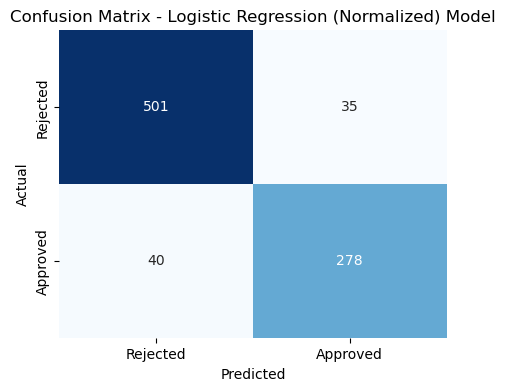


Logistic Regression (Standardized) Model Confusion Matrix:
[[498  38]
 [ 43 275]]

Logistic Regression (Standardized) Model Performance:
Accuracy: 0.91
Precision: 0.88
Recall: 0.86
F1 Score: 0.87
AUC-ROC: 0.97


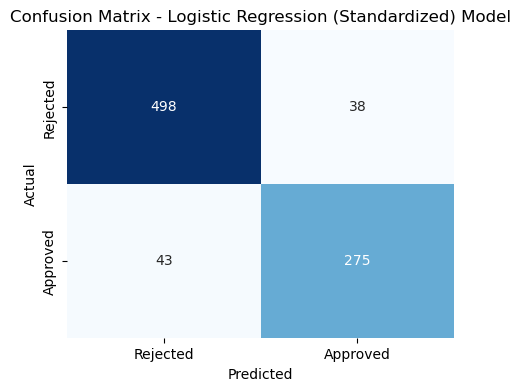

In [40]:
def evaluate_model(y_test, y_pred, model, X_test, model_name):
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Model Confusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")

    # Visualize Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title(f"Confusion Matrix - {model_name} Model")
    plt.show()

# Evaluate Logistic Regression on normalized data
evaluate_model(y_test, y_pred_normalized, model_normalized, X_test_normalized, "Logistic Regression (Normalized)")

# Evaluate Logistic Regression on standardized data
evaluate_model(y_test, y_pred_standardized, model_standardized, X_test_standardized, "Logistic Regression (Standardized)")

### Model training - RANDOM FOREST - Normalized and Standardized

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model on normalized data
rf_model_normalized = RandomForestClassifier(random_state=42)
rf_model_normalized.fit(X_train_normalized, y_train)
y_pred_rf_normalized = rf_model_normalized.predict(X_test_normalized)

# Train Random Forest model on standardized data
rf_model_standardized = RandomForestClassifier(random_state=42)
rf_model_standardized.fit(X_train_standardized, y_train)
y_pred_rf_standardized = rf_model_standardized.predict(X_test_standardized)

### Evaluation RANDOM FOREST - Normalized and Standardized


Random Forest (Normalized) Model Performance:
Confusion Matrix:
[[529   7]
 [ 11 307]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Random Forest Feature Importance:
                     Feature  Importance
4                cibil_score    0.800338
3                  loan_term    0.060604
2                loan_amount    0.028088
11         Total_Asset_Value    0.018429
1               income_annum    0.017556
5   residential_assets_value    0.017068
7        luxury_assets_value    0.015470
8           bank_asset_value    0.015346
6    commercial_assets_value    0.015162
0           no_of_dependents    0.007289
10         self_employed_Yes    0.002417
9     education_Not Graduate    0.002234


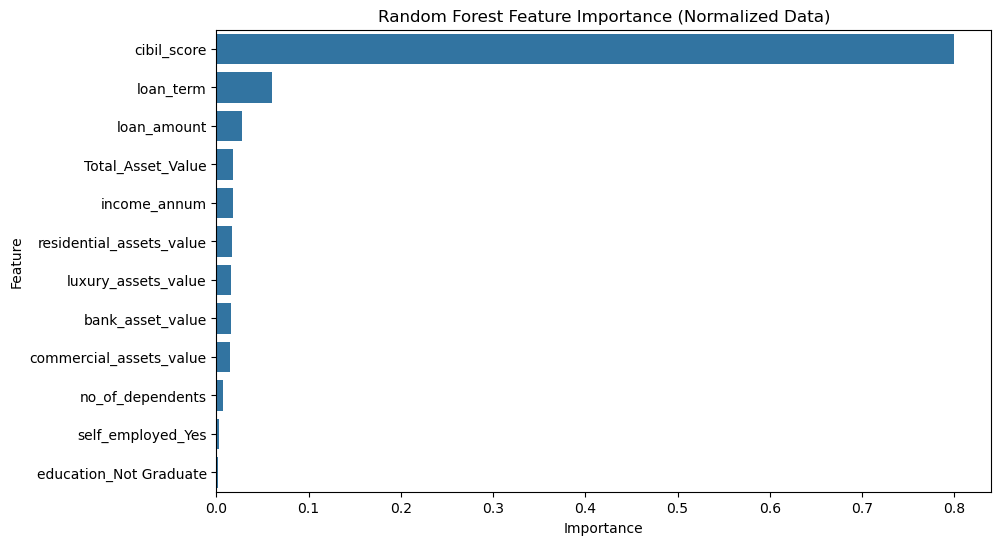


Random Forest (Normalized) Model Confusion Matrix:
[[529   7]
 [ 11 307]]

Random Forest (Normalized) Model Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
AUC-ROC: 1.00


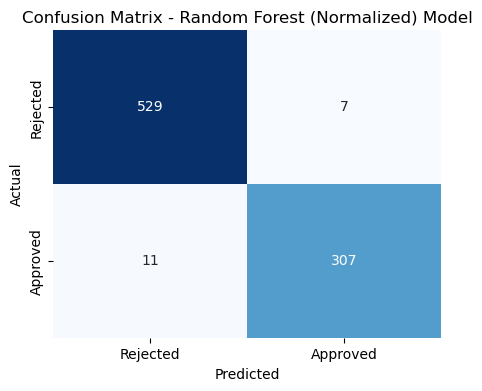

In [53]:
# Step 3: Evaluate Random Forest Model Performance
cm_rf_normalized = confusion_matrix(y_test, y_pred_rf_normalized)
accuracy_rf_normalized = accuracy_score(y_test, y_pred_rf_normalized)
precision_rf_normalized = precision_score(y_test, y_pred_rf_normalized, average='weighted', zero_division=0)
recall_rf_normalized = recall_score(y_test, y_pred_rf_normalized, average='weighted', zero_division=0)
f1_rf_normalized = f1_score(y_test, y_pred_rf_normalized, average='weighted', zero_division=0)

# Display metrics for the normalized model
print("\nRandom Forest (Normalized) Model Performance:")
print("Confusion Matrix:")
print(cm_rf_normalized)
print(f"Accuracy: {accuracy_rf_normalized:.2f}")
print(f"Precision: {precision_rf_normalized:.2f}")
print(f"Recall: {recall_rf_normalized:.2f}")
print(f"F1 Score: {f1_rf_normalized:.2f}")

# Step 4: Calculate Feature Importance
importances = rf_model_normalized.feature_importances_

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the feature importance values in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Random Forest Feature Importance:")
print(feature_importance)

# Step 5: Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance (Normalized Data)')
plt.show()

# Evaluate Random Forest on normalized data
evaluate_model(y_test, y_pred_rf_normalized, rf_model_normalized, X_test_normalized, "Random Forest (Normalized)")


Random Forest (Standardized) Model Performance:
Confusion Matrix:
[[529   7]
 [ 11 307]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Random Forest Feature Importance:
                     Feature  Importance
4                cibil_score    0.800338
3                  loan_term    0.060604
2                loan_amount    0.028088
11         Total_Asset_Value    0.018429
1               income_annum    0.017556
5   residential_assets_value    0.017068
7        luxury_assets_value    0.015470
8           bank_asset_value    0.015346
6    commercial_assets_value    0.015162
0           no_of_dependents    0.007289
10         self_employed_Yes    0.002417
9     education_Not Graduate    0.002234


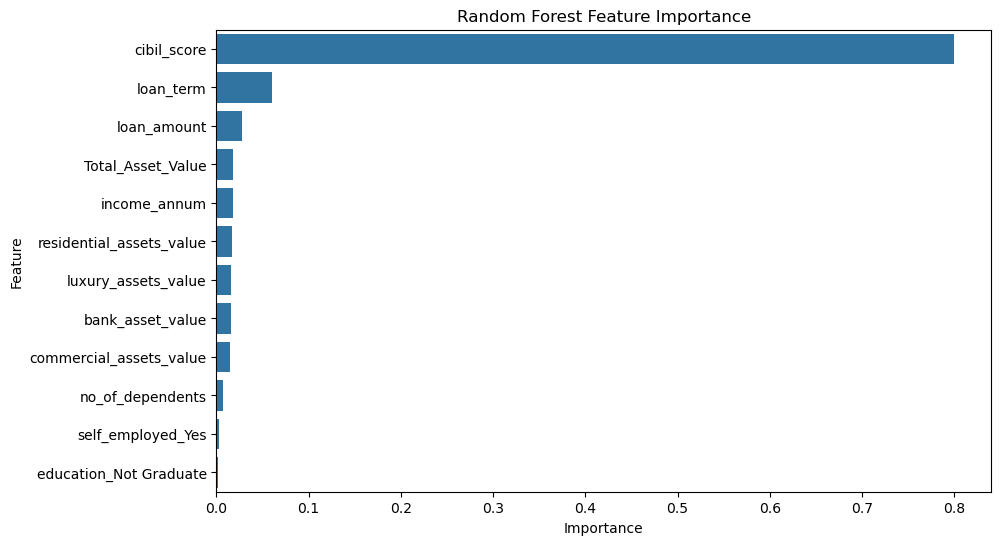


Random Forest (Standardized) Model Confusion Matrix:
[[529   7]
 [ 11 307]]

Random Forest (Standardized) Model Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
AUC-ROC: 1.00


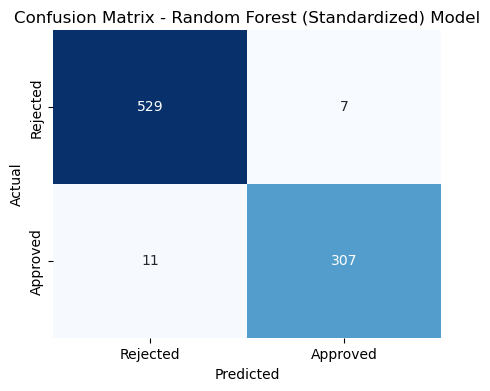

In [52]:
# Evaluate Random Forest Model Performance
cm_rf_standardized = confusion_matrix(y_test, y_pred_rf_standardized)
accuracy_rf_standardized = accuracy_score(y_test, y_pred_rf_standardized)
precision_rf_standardized = precision_score(y_test, y_pred_rf_standardized, average='weighted', zero_division=0)
recall_rf_standardized = recall_score(y_test, y_pred_rf_standardized, average='weighted', zero_division=0)
f1_rf_standardized = f1_score(y_test, y_pred_rf_standardized, average='weighted', zero_division=0)

# Display metrics for the standardized model
print("\nRandom Forest (Standardized) Model Performance:")
print("Confusion Matrix:")
print(cm_rf_standardized)
print(f"Accuracy: {accuracy_rf_standardized:.2f}")
print(f"Precision: {precision_rf_standardized:.2f}")
print(f"Recall: {recall_rf_standardized:.2f}")
print(f"F1 Score: {f1_rf_standardized:.2f}")

# Calculate Feature Importance
importances = rf_model_standardized.feature_importances_

# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the feature importance values in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Random Forest Feature Importance:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

# Evaluate Random Forest on standardized data
evaluate_model(y_test, y_pred_rf_standardized, rf_model_standardized, X_test_standardized, "Random Forest (Standardized)")


### Model training - KNN _ Normalized and standardize

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model on normalized data
knn_model_normalized = KNeighborsClassifier(n_neighbors=5)
knn_model_normalized.fit(X_train_normalized, y_train)
y_pred_knn_normalized = knn_model_normalized.predict(X_test_normalized)

# Train KNN model on standardized data
knn_model_standardized = KNeighborsClassifier(n_neighbors=5)
knn_model_standardized.fit(X_train_standardized, y_train)
y_pred_knn_standardized = knn_model_standardized.predict(X_test_standardized)

### Correlation Normalized

Correlation with Target Variable (Normalized):
loan_status                 1.000000
loan_term                   0.038037
residential_assets_value    0.024435
commercial_assets_value     0.024256
loan_amount                 0.019055
education_Not Graduate      0.018778
Total_Asset_Value           0.012786
income_annum                0.006738
no_of_dependents            0.003703
luxury_assets_value         0.000341
bank_asset_value           -0.005773
self_employed_Yes          -0.008048
cibil_score                -0.022499
Name: loan_status, dtype: float64


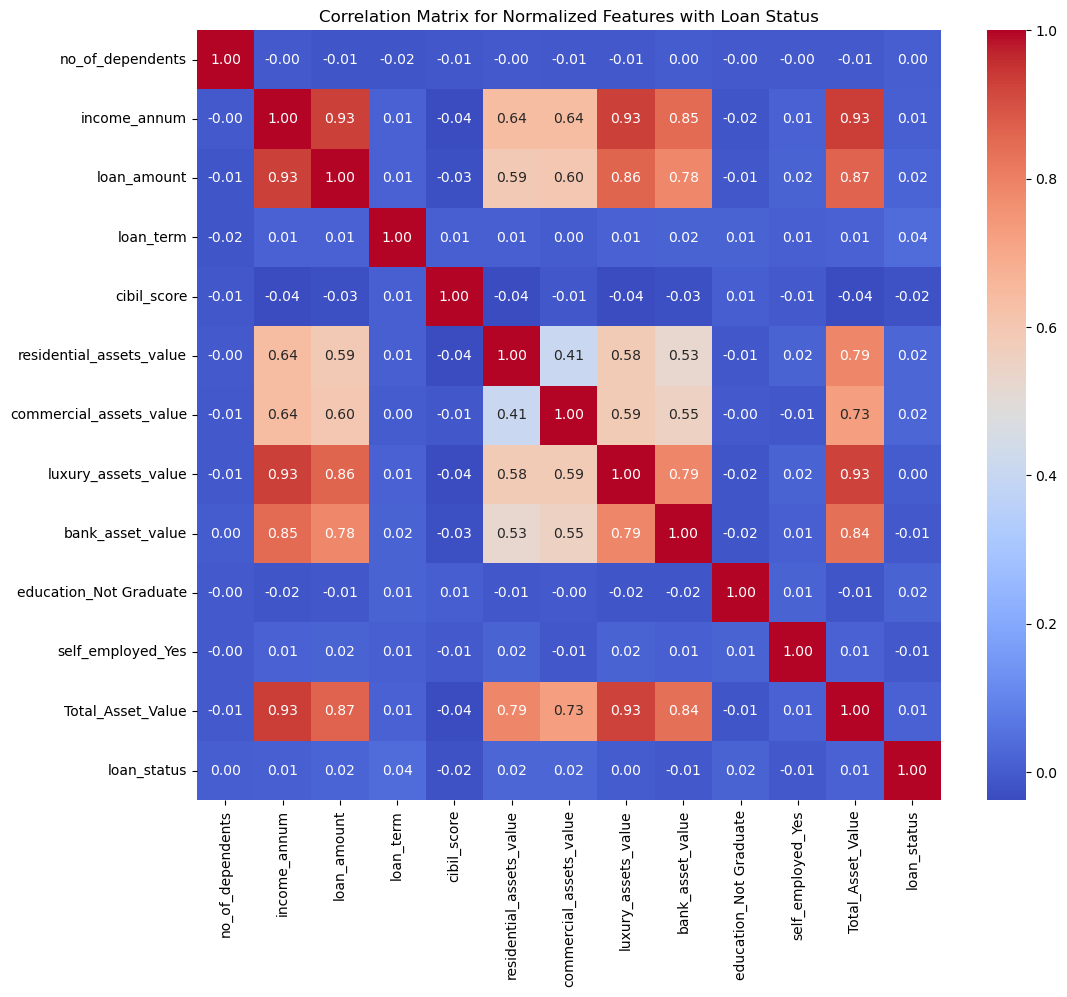

In [66]:
# Calculate the correlation for the normalized features
normalized_features_target_corr = pd.concat([X_train_normalized, y_train.reset_index(drop=True)], axis=1).corr()

# Display the correlation of features with the target variable
print("Correlation with Target Variable (Normalized):")
print(normalized_features_target_corr['loan_status'].sort_values(ascending=False))

# Visualize the correlation matrix for normalized features
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_features_target_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Normalized Features with Loan Status')
plt.show()

### Correlation Standardize

Correlation with Target Variable (Standardized):
loan_status                 1.000000
loan_term                   0.038037
residential_assets_value    0.024435
commercial_assets_value     0.024256
loan_amount                 0.019055
education_Not Graduate      0.018778
Total_Asset_Value           0.012786
income_annum                0.006738
no_of_dependents            0.003703
luxury_assets_value         0.000341
bank_asset_value           -0.005773
self_employed_Yes          -0.008048
cibil_score                -0.022499
Name: loan_status, dtype: float64


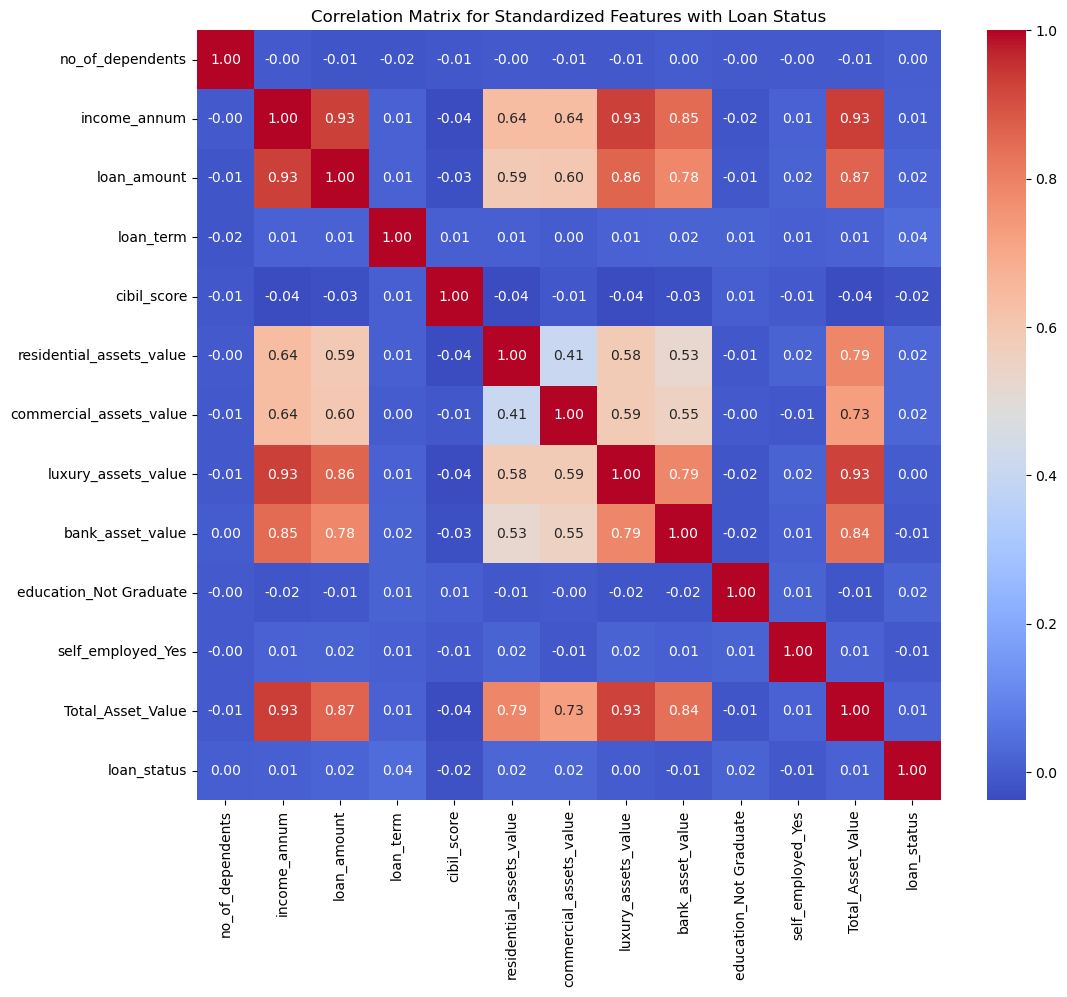

In [65]:
# Correlation standardized
standardized_features_target_corr = pd.concat([X_train_standardized, y_train.reset_index(drop=True)], axis=1).corr()

# Display the correlation of features with the target variable
print("Correlation with Target Variable (Standardized):")
print(standardized_features_target_corr['loan_status'].sort_values(ascending=False))

# Visualize the correlation matrix for standardized features
plt.figure(figsize=(12, 10))
sns.heatmap(standardized_features_target_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Standardized Features with Loan Status')
plt.show()

### Evaluation KNN - Normalized

KNN (k=1) Accuracy: 0.88
KNN (k=3) Accuracy: 0.90
KNN (k=5) Accuracy: 0.90
KNN (k=7) Accuracy: 0.89
KNN (k=10) Accuracy: 0.90
KNN (k=15) Accuracy: 0.91
KNN (k=20) Accuracy: 0.90
KNN (k=25) Accuracy: 0.90


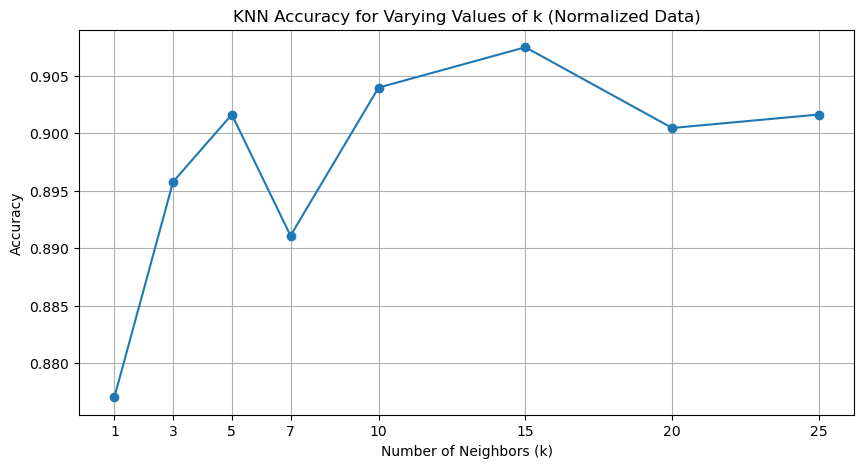


KNN (Normalized) Model Confusion Matrix:
[[489  47]
 [ 37 281]]

KNN (Normalized) Model Performance:
Accuracy: 0.90
Precision: 0.86
Recall: 0.88
F1 Score: 0.87
AUC-ROC: 0.96


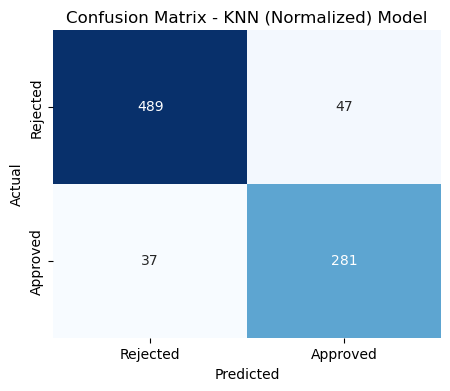

In [55]:
k_values = [1, 3, 5, 7, 10, 15, 20, 25]
knn_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_normalized, y_train)  # Fit on normalized data
    y_pred_knn = knn_model.predict(X_test_normalized)  # Predict on normalized test data
    accuracy = accuracy_score(y_test, y_pred_knn)  # Calculate accuracy
    knn_accuracies.append(accuracy)
    print(f"KNN (k={k}) Accuracy: {accuracy:.2f}")

# Plotting the accuracies for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy for Varying Values of k (Normalized Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Evaluate KNN on normalized data
evaluate_model(y_test, y_pred_knn_normalized, knn_model_normalized, X_test_normalized, "KNN (Normalized)")

#Analysis:
#The KNN model's accuracy varies fairly consistently across different values of ( k ), 
#peaking at 0.91 when ( k = 15 ). This value of ( k ) appears to balance sensitivity to noise and generalizability well.

### Evaluation KNN - Standardized

KNN (k=1) Accuracy: 0.87
KNN (k=3) Accuracy: 0.89
KNN (k=5) Accuracy: 0.89
KNN (k=7) Accuracy: 0.90
KNN (k=10) Accuracy: 0.90
KNN (k=15) Accuracy: 0.90
KNN (k=20) Accuracy: 0.91
KNN (k=25) Accuracy: 0.90


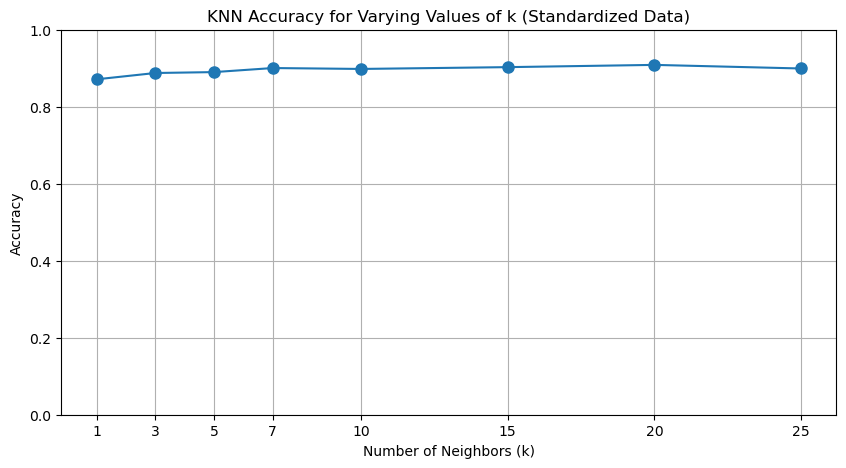


KNN (Standardized) Model Confusion Matrix:
[[481  55]
 [ 39 279]]

KNN (Standardized) Model Performance:
Accuracy: 0.89
Precision: 0.84
Recall: 0.88
F1 Score: 0.86
AUC-ROC: 0.97


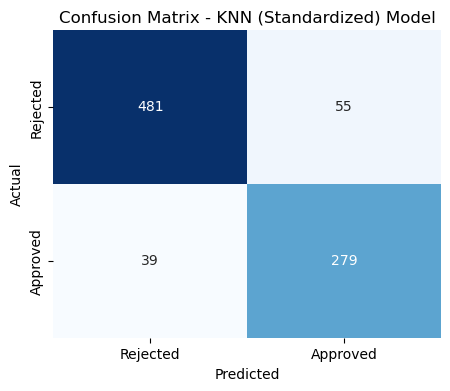

In [56]:
# Evaluate KNN Model Performance Across Multiple k Values
k_values = [1, 3, 5, 7, 10, 15, 20, 25]
knn_accuracies = []

for k in k_values:
    knn_model_standardized = KNeighborsClassifier(n_neighbors=k)  # KNN Model with different k values
    knn_model_standardized.fit(X_train_standardized, y_train)  # Fit on standardized data
    y_pred_standardized = knn_model_standardized.predict(X_test_standardized)  # Predict on standardized data
    accuracy = accuracy_score(y_test, y_pred_standardized)  # Calculate accuracy
    knn_accuracies.append(accuracy)  # Store accuracy for this k value
    print(f"KNN (k={k}) Accuracy: {accuracy:.2f}")

# Step 4: Plot the accuracies for different k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o', markersize=8, linestyle='-')
plt.title('KNN Accuracy for Varying Values of k (Standardized Data)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.ylim(0, 1)  # Adjust as necessary based on your accuracy range
plt.grid()
plt.show()

# Evaluate KNN on standardized data
evaluate_model(y_test, y_pred_knn_standardized, knn_model_standardized, X_test_standardized, "KNN (Standardized)")

### Summarize metrics with graphics

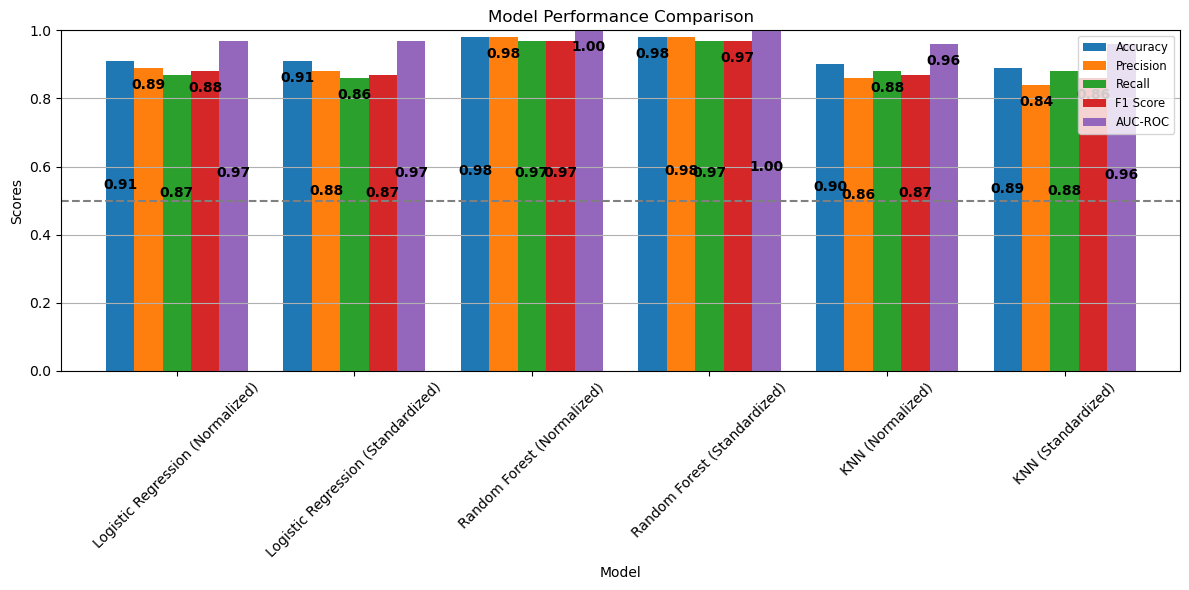

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Store the performance metrics in a DataFrame
metrics_data = {
    'Model': ['Logistic Regression (Normalized)', 'Logistic Regression (Standardized)',
              'Random Forest (Normalized)', 'Random Forest (Standardized)', 
              'KNN (Normalized)', 'KNN (Standardized)'],
    'Accuracy': [0.91, 0.91, 0.98, 0.98, 0.90, 0.89],
    'Precision': [0.89, 0.88, 0.98, 0.98, 0.86, 0.84],
    'Recall': [0.87, 0.86, 0.97, 0.97, 0.88, 0.88],
    'F1 Score': [0.88, 0.87, 0.97, 0.97, 0.87, 0.86],
    'AUC-ROC': [0.97, 0.97, 1.00, 1.00, 0.96, 0.96]
}

metrics_df = pd.DataFrame(metrics_data)

# Step 2: Plot the performance metrics
ax = metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6), width=0.8)

# Add title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Y-axis limits from 0 to 1 since scores are probabilities
plt.axhline(0.5, color='gray', linestyle='--')  # Optional: Add a line for reference
plt.grid(axis='y')
plt.legend(loc='best', fontsize='small')

# Step 3: Add numbers with alternating placement within each block of bars
for i, p in enumerate(ax.patches):
    # Get the height of the current bar
    value = format(p.get_height(), '.2f')
    
    # Alternate the position within each group of 5 bars
    if i % 5 == 0:  # First bar in the group
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.6),  # Slightly above middle (60% of bar height)
                    ha='center', va='center', 
                    fontsize=10, color='black', fontweight='bold')
    elif i % 5 == 1:  # Second bar in the group
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() - 0.05),  # Near the top
                    ha='center', va='center', 
                    fontsize=10, color='black', fontweight='bold')
    elif i % 5 == 2:  # Third bar in the group
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.6),  # Slightly above middle (60% of bar height)
                    ha='center', va='center', 
                    fontsize=10, color='black', fontweight='bold')
    elif i % 5 == 3:  # Fourth bar in the group
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() - 0.05),  # Near the top
                    ha='center', va='center', 
                    fontsize=10, color='black', fontweight='bold')
    else:  # Fifth bar in the group (AUC-ROC)
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.6),  # Slightly above middle (60% of bar height)
                    ha='center', va='center', 
                    fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

### Grouped confusion matrices

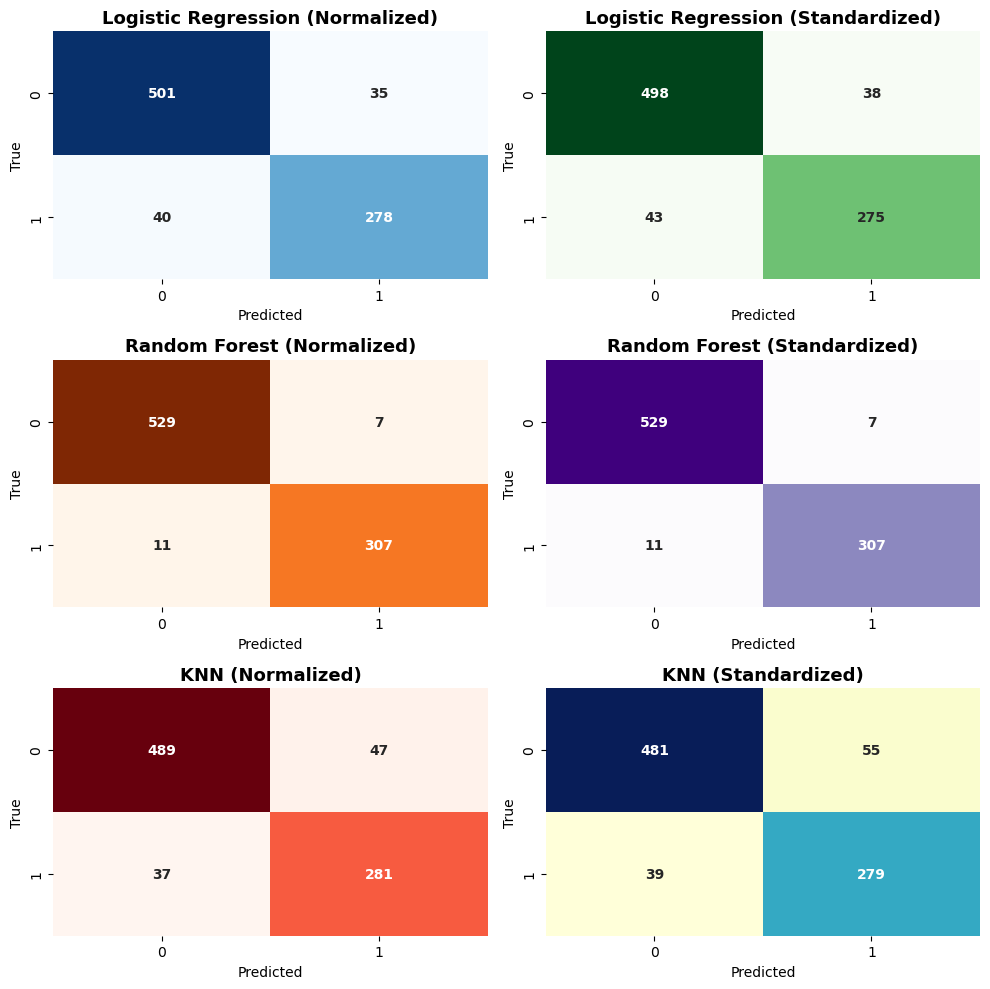

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrices from the outputs
conf_matrices = {
    "Logistic Regression (Normalized)": np.array([[501, 35], [40, 278]]),"Logistic Regression (Standardized)": np.array([[498, 38], [43, 275]]),
    "Random Forest (Normalized)": np.array([[529, 7], [11, 307]]),"Random Forest (Standardized)": np.array([[529, 7], [11, 307]]),"KNN (Normalized)": np.array([[489, 47], [37, 281]]),"KNN (Standardized)": np.array([[481, 55], [39, 279]])}

# List of color maps for enhanced visualization
color_maps = [
    "Blues",      # Logistic Regression (Normalized)
    "Greens",     # Logistic Regression (Standardized)
    "Oranges",    # Random Forest (Normalized)
    "Purples",    # Random Forest (Standardized)
    "Reds",       # KNN (Normalized)
    "YlGnBu"      # KNN (Standardized)
]

# Plotting the confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # 3 rows, 2 columns

for ax, (title, cm), cmap in zip(axes.flatten(), conf_matrices.items(), color_maps):
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=cmap, ax=ax, annot_kws={"fontweight": "bold"})
    ax.set_title(title, fontweight="bold", fontsize=13)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Step 1: Store the performance metrics in a DataFrame
metrics_data = {
    'Model': ['Logistic Regression (Normalized)', 'Logistic Regression (Standardized)',
              'Random Forest (Normalized)', 'Random Forest (Standardized)', 
              'KNN (Normalized)', 'KNN (Standardized)'],
    'Accuracy': [0.91, 0.91, 0.98, 0.98, 0.90, 0.89],
    'Precision': [0.89, 0.88, 0.98, 0.98, 0.86, 0.84],
    'Recall': [0.87, 0.86, 0.97, 0.97, 0.88, 0.88],
    'F1 Score': [0.88, 0.87, 0.97, 0.97, 0.87, 0.86],
    'AUC-ROC': [0.97, 0.97, 1.00, 1.00, 0.96, 0.96]
}

# Step 2: Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Step 3: Display the table
print(metrics_df)

                                Model  Accuracy  Precision  Recall  F1 Score  \
0    Logistic Regression (Normalized)      0.91       0.89    0.87      0.88   
1  Logistic Regression (Standardized)      0.91       0.88    0.86      0.87   
2          Random Forest (Normalized)      0.98       0.98    0.97      0.97   
3        Random Forest (Standardized)      0.98       0.98    0.97      0.97   
4                    KNN (Normalized)      0.90       0.86    0.88      0.87   
5                  KNN (Standardized)      0.89       0.84    0.88      0.86   

   AUC-ROC  
0     0.97  
1     0.97  
2     1.00  
3     1.00  
4     0.96  
5     0.96  


Logistic Regression:

Normalized:
Accuracy: 0.91
Precision: 0.89
Recall: 0.87
F1 Score: 0.88
AUC-ROC: 0.97
Standardized:
Accuracy: 0.91
Precision: 0.88
Recall: 0.86
F1 Score: 0.87
AUC-ROC: 0.97
#### Analysis:
Both versions show consistent performance.
Balanced precision and recall with a high AUC-ROC of 0.97.
Pros: Good balance of metrics, slightly better recall in the normalized version (captures more positive cases).
Cons: Lower performance compared to other models.
Random Forest:

Normalized:
Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
AUC-ROC: 1.00
Standardized:
Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
AUC-ROC: 1.00
#### Analysis:
Both versions perform exceptionally well, with identical metrics.
AUC-ROC of 1.00 indicates near-perfect separation of classes.
Pros: Best performance across all metrics, highly reliable and consistent.
Cons: More computationally intensive compared to Logistic Regression.
K-Nearest Neighbors (KNN):

Normalized:
Accuracy: 0.90
Precision: 0.86
Recall: 0.88
F1 Score: 0.87
AUC-ROC: 0.96
Standardized:
Accuracy: 0.89
Precision: 0.84
Recall: 0.88
F1 Score: 0.86
AUC-ROC: 0.96
#### Analysis:
KNN lags behind in performance.
Lower precision and recall than both Logistic Regression and Random Forest.
Pros: Simpler and more interpretable.
Cons: Weaker performance and higher risk of misclassification.
Recommendation:

#### Random Forest (either normalized or standardized) is the best model due to its superior accuracy (0.98), precision (0.98), recall (0.97), F1 score (0.97), and AUC-ROC of 1.00. It provides excellent predictive ability for loan approvals.

Logistic Regression (Normalized) is a good alternative if simplicity is preferred. It has reasonable accuracy (0.91) and F1 score (0.88), though not as strong as Random Forest.

KNN is not recommended due to lower performance metrics compared to the other models.

#### Conclusion: Choose Random Forest for the best overall performance.

### Model Development and Initial Tuning

### Logistic regression Hyperparameter Tuning with grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # You can also consider adding 'lbfgs' if you're using L2 penalty and see if it solves the issue
}

# Perform Grid Search with additional iterations
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, scoring='accuracy', cv=5)
grid_search_lr.fit(X_train_normalized, y_train)  # Fit on normalized training data

# Get the best model
best_model_lr = grid_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


### Random Forest Hyperparameter Tuning with grid search

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

# Perform Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train_normalized, y_train)  # Fit on normalized training data
best_model_rf = grid_search_rf.best_estimator_

# Print the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### KNN Hyperparameter Tuning with grid search

In [72]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for KNN
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20]}

# Perform Grid Search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train_normalized, y_train)  # Fit on normalized training data
best_model_knn = grid_search_knn.best_estimator_

# Print the best parameters
print("Best parameters for KNN:", grid_search_knn.best_params_)

Best parameters for KNN: {'n_neighbors': 20}


### Refit : Refit Models with Best Parameters: After identifying the best parameters with Grid Search, 
### it's a good idea to refit your models using those parameters to ensure that all optimizations are applied:

In [74]:
# Refit Logistic Regression
optimized_model_lr = LogisticRegression(C=0.1, penalty='l1', solver='saga')
optimized_model_lr.fit(X_train_normalized, y_train)

# Refit KNN with best parameter
optimized_knn_model = KNeighborsClassifier(n_neighbors=20)
optimized_knn_model.fit(X_train_normalized, y_train)

# Refit Random Forest with best parameters
optimized_rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, random_state=42)
optimized_rf_model.fit(X_train_normalized, y_train)  # Use normalized or standardized data as appropriate

RandomForestClassifier(n_estimators=200, random_state=42)

In [75]:
# Predictions
y_pred_lr = optimized_model_lr.predict(X_test_normalized)
y_pred_knn = optimized_knn_model.predict(X_test_normalized)
y_pred_rf = optimized_rf_model.predict(X_test_normalized)

# Evaluate each model
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"{model_name} Performance:")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")
  
# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Logistic Regression (Optimized)")
evaluate_model(y_test, y_pred_knn, "KNN (Optimized)")
evaluate_model(y_test, y_pred_rf, "Random Forest (Optimized)")

Logistic Regression (Optimized) Performance:
Confusion Matrix:
 [[500  36]
 [ 37 281]]
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91

KNN (Optimized) Performance:
Confusion Matrix:
 [[496  40]
 [ 45 273]]
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90

Random Forest (Optimized) Performance:
Confusion Matrix:
 [[530   6]
 [ 11 307]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98



### Cross validation - is a technique used to assess how the results of a statistical analysis will generalize to an independent dataset. It is essential for avoiding overfitting, as it allows the model to be trained and validated on different subsets of the data.

In [82]:
from sklearn.model_selection import cross_val_score

# Use the best logistic regression model found from Grid Search
# Apply Cross-Validation
cv_scores_lr = cross_val_score(best_model_lr, X_train_normalized, y_train, cv=5)  # 5-fold cross-validation

# Report the results
print(f"Logistic Regression CV Scores: {cv_scores_lr}")
print(f"Mean CV Accuracy for Logistic Regression: {np.mean(cv_scores_lr):.2f}")

Logistic Regression CV Scores: [0.91215227 0.91947291 0.92240117 0.91947291 0.93265007]
Mean CV Accuracy for Logistic Regression: 0.92


In [77]:
# Use the best random forest model from Grid Search
# Apply Cross-Validation
cv_scores_rf = cross_val_score(best_model_rf, X_train_normalized, y_train, cv=5)  # 5-fold cross-validation

# Report the results
print(f"Random Forest CV Scores: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest: {np.mean(cv_scores_rf):.2f}")


Random Forest CV Scores: [0.98096633 0.97657394 0.97803807 0.9795022  0.98389458]
Mean CV Accuracy for Random Forest: 0.98


In [78]:
# Use the best KNN model from Grid Search
# Apply Cross-Validation
cv_scores_knn = cross_val_score(knn_model_normalized, X_train_normalized, y_train, cv=5)  # 5-fold cross-validation

# Report the results
print(f"KNN CV Scores: {cv_scores_knn}")
print(f"Mean CV Accuracy for KNN: {np.mean(cv_scores_knn):.2f}")

KNN CV Scores: [0.88726208 0.89458272 0.90775988 0.90190337 0.9033675 ]
Mean CV Accuracy for KNN: 0.90
